In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("loan_data.csv")

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [24]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df.dropna().isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

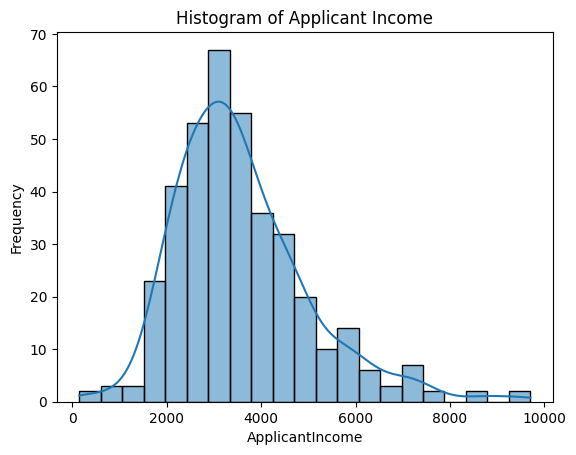

In [31]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("ApplicantIncome")
plt.ylabel("Frequency")
plt.show()

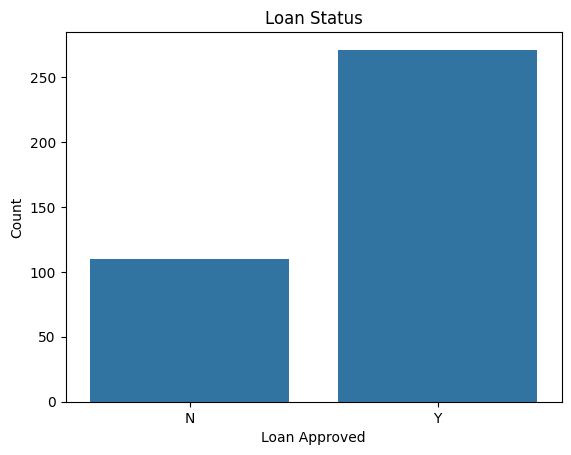

In [32]:
sns.countplot(x="Loan_Status", data = df)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [34]:
df.groupby("Education")["LoanAmount"].mean().reset_index()

,Education,LoanAmount
0,Graduate,105.190647
1,Not Graduate,104.436893


In [35]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()

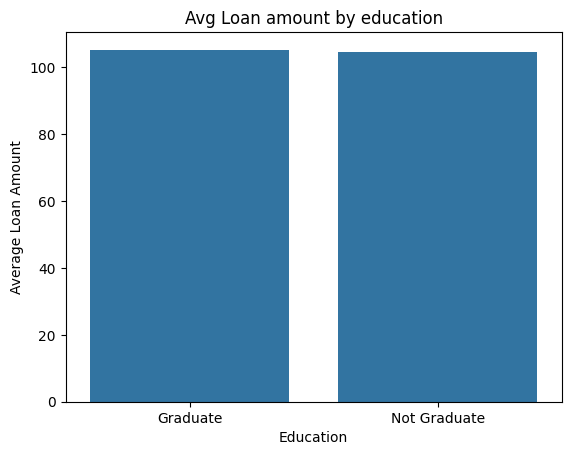

In [37]:
sns.barplot(x="Education", y="LoanAmount", data = avg_loan_amount_by_education)
plt.title("Avg Loan amount by education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

In [38]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

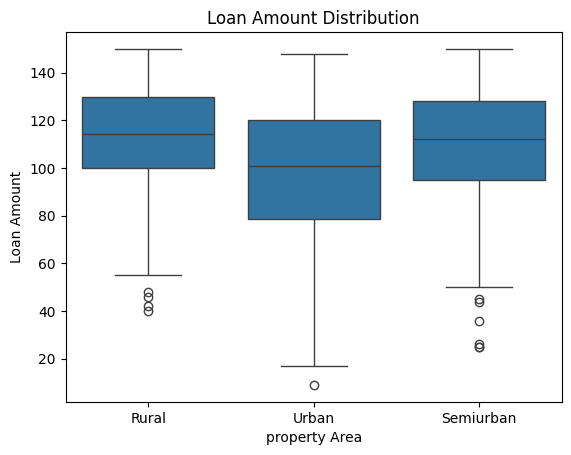

In [40]:
sns.boxplot(x="Property_Area", y="LoanAmount", data = df)
plt.title("Loan Amount Distribution")
plt.xlabel("property Area")
plt.ylabel("Loan Amount")
plt.show()

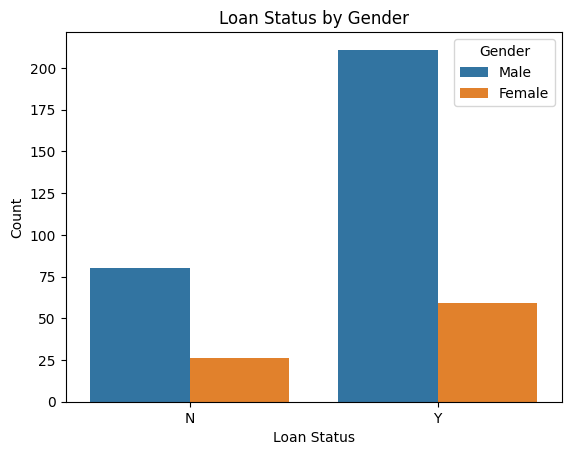

In [41]:
sns.countplot(x="Loan_Status", hue="Gender", data=df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

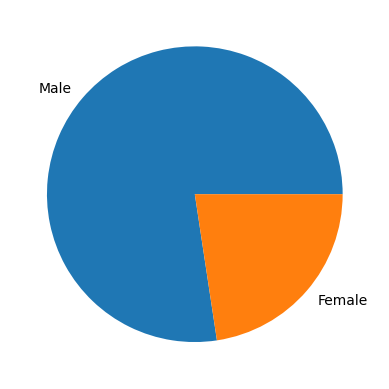

In [45]:
df["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [46]:
loan_status_by_Married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

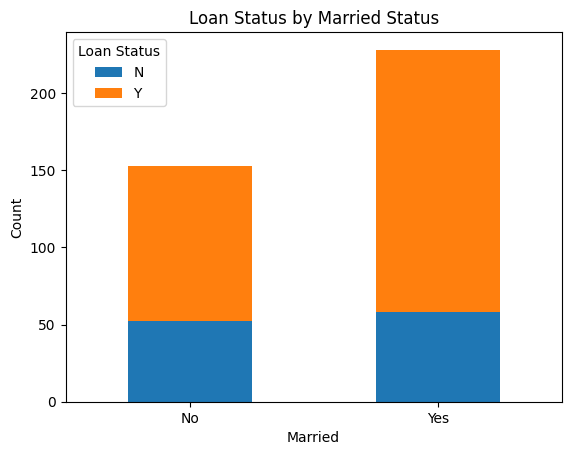

In [49]:
loan_status_by_Married.plot(kind="bar", stacked=True)
plt.title("Loan Status by Married Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title = "Loan Status")
plt.xticks(rotation=0)
plt.show()